# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data (1).csv')
price_df = pd.read_csv('./price_data (1).csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [9]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

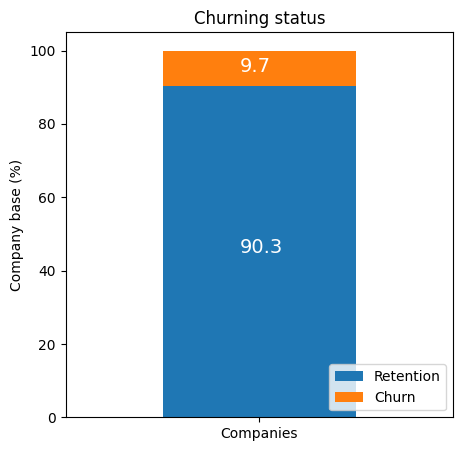

In [10]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

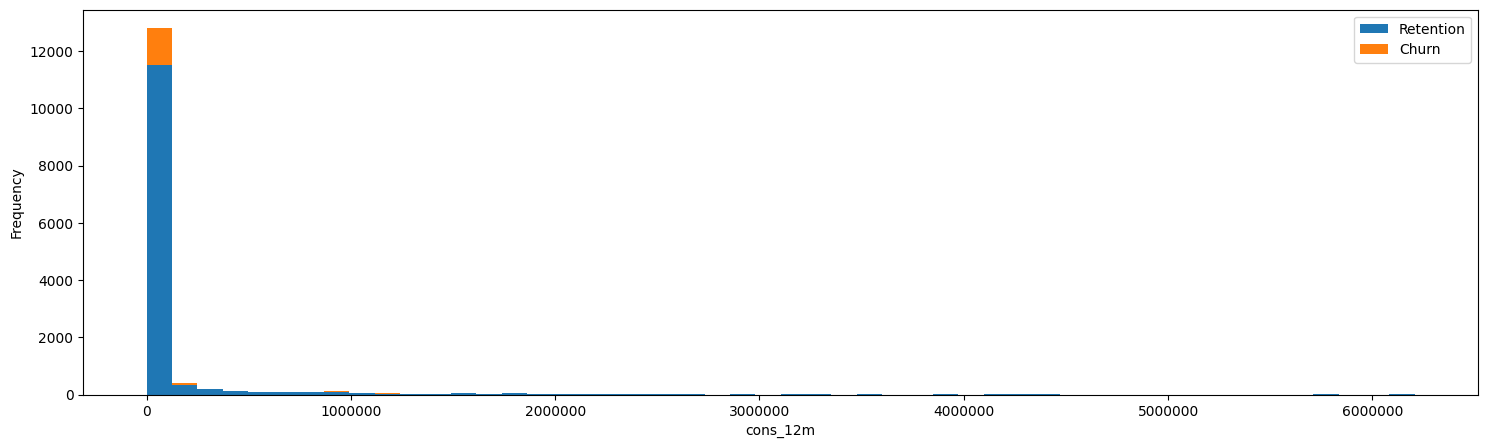

In [11]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

MISSING VALUES ANALYSIS

Client Data: No missing values found!

Price Data: No missing values found!

CHURN DISTRIBUTION BY CATEGORICAL VARIABLES


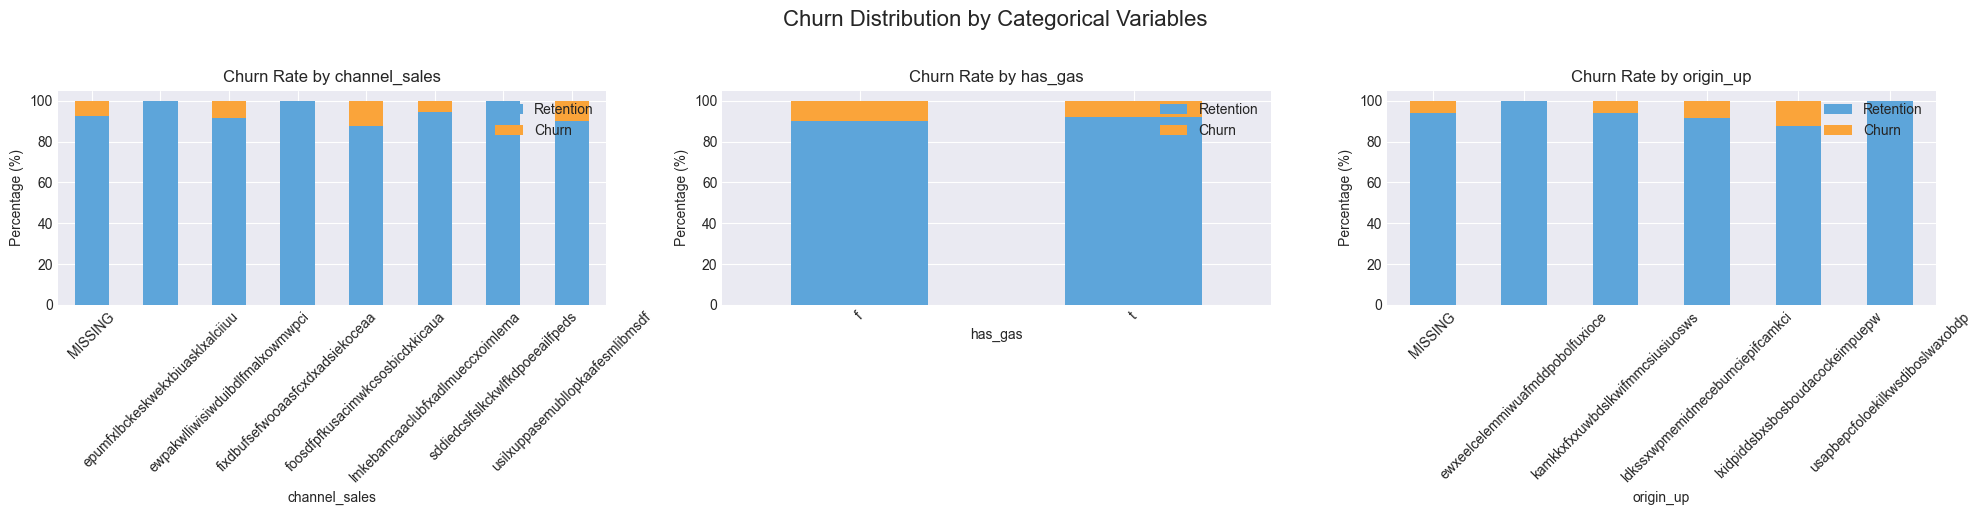


Churn Rate by channel_sales:
                                  Churned  Total  Churn_Rate
channel_sales                                               
foosdfpfkusacimwkcsosbicdxkicaua      820   6754   12.140954
usilxuppasemubllopkaafesmlibmsdf      138   1375   10.036364
ewpakwlliwisiwduibdlfmalxowmwpci       75    893    8.398656
MISSING                               283   3725    7.597315
lmkebamcaaclubfxadlmueccxoimlema      103   1843    5.588714
epumfxlbckeskwekxbiuasklxalciiuu        0      3    0.000000
fixdbufsefwooaasfcxdxadsiekoceaa        0      2    0.000000
sddiedcslfslkckwlfkdpoeeailfpeds        0     11    0.000000

Churn Rate by has_gas:
         Churned  Total  Churn_Rate
has_gas                            
f           1202  11955   10.054371
t            217   2651    8.185590

Churn Rate by origin_up:
                                  Churned  Total  Churn_Rate
origin_up                                                   
lxidpiddsbxsbosboudacockeimpuepw      893   

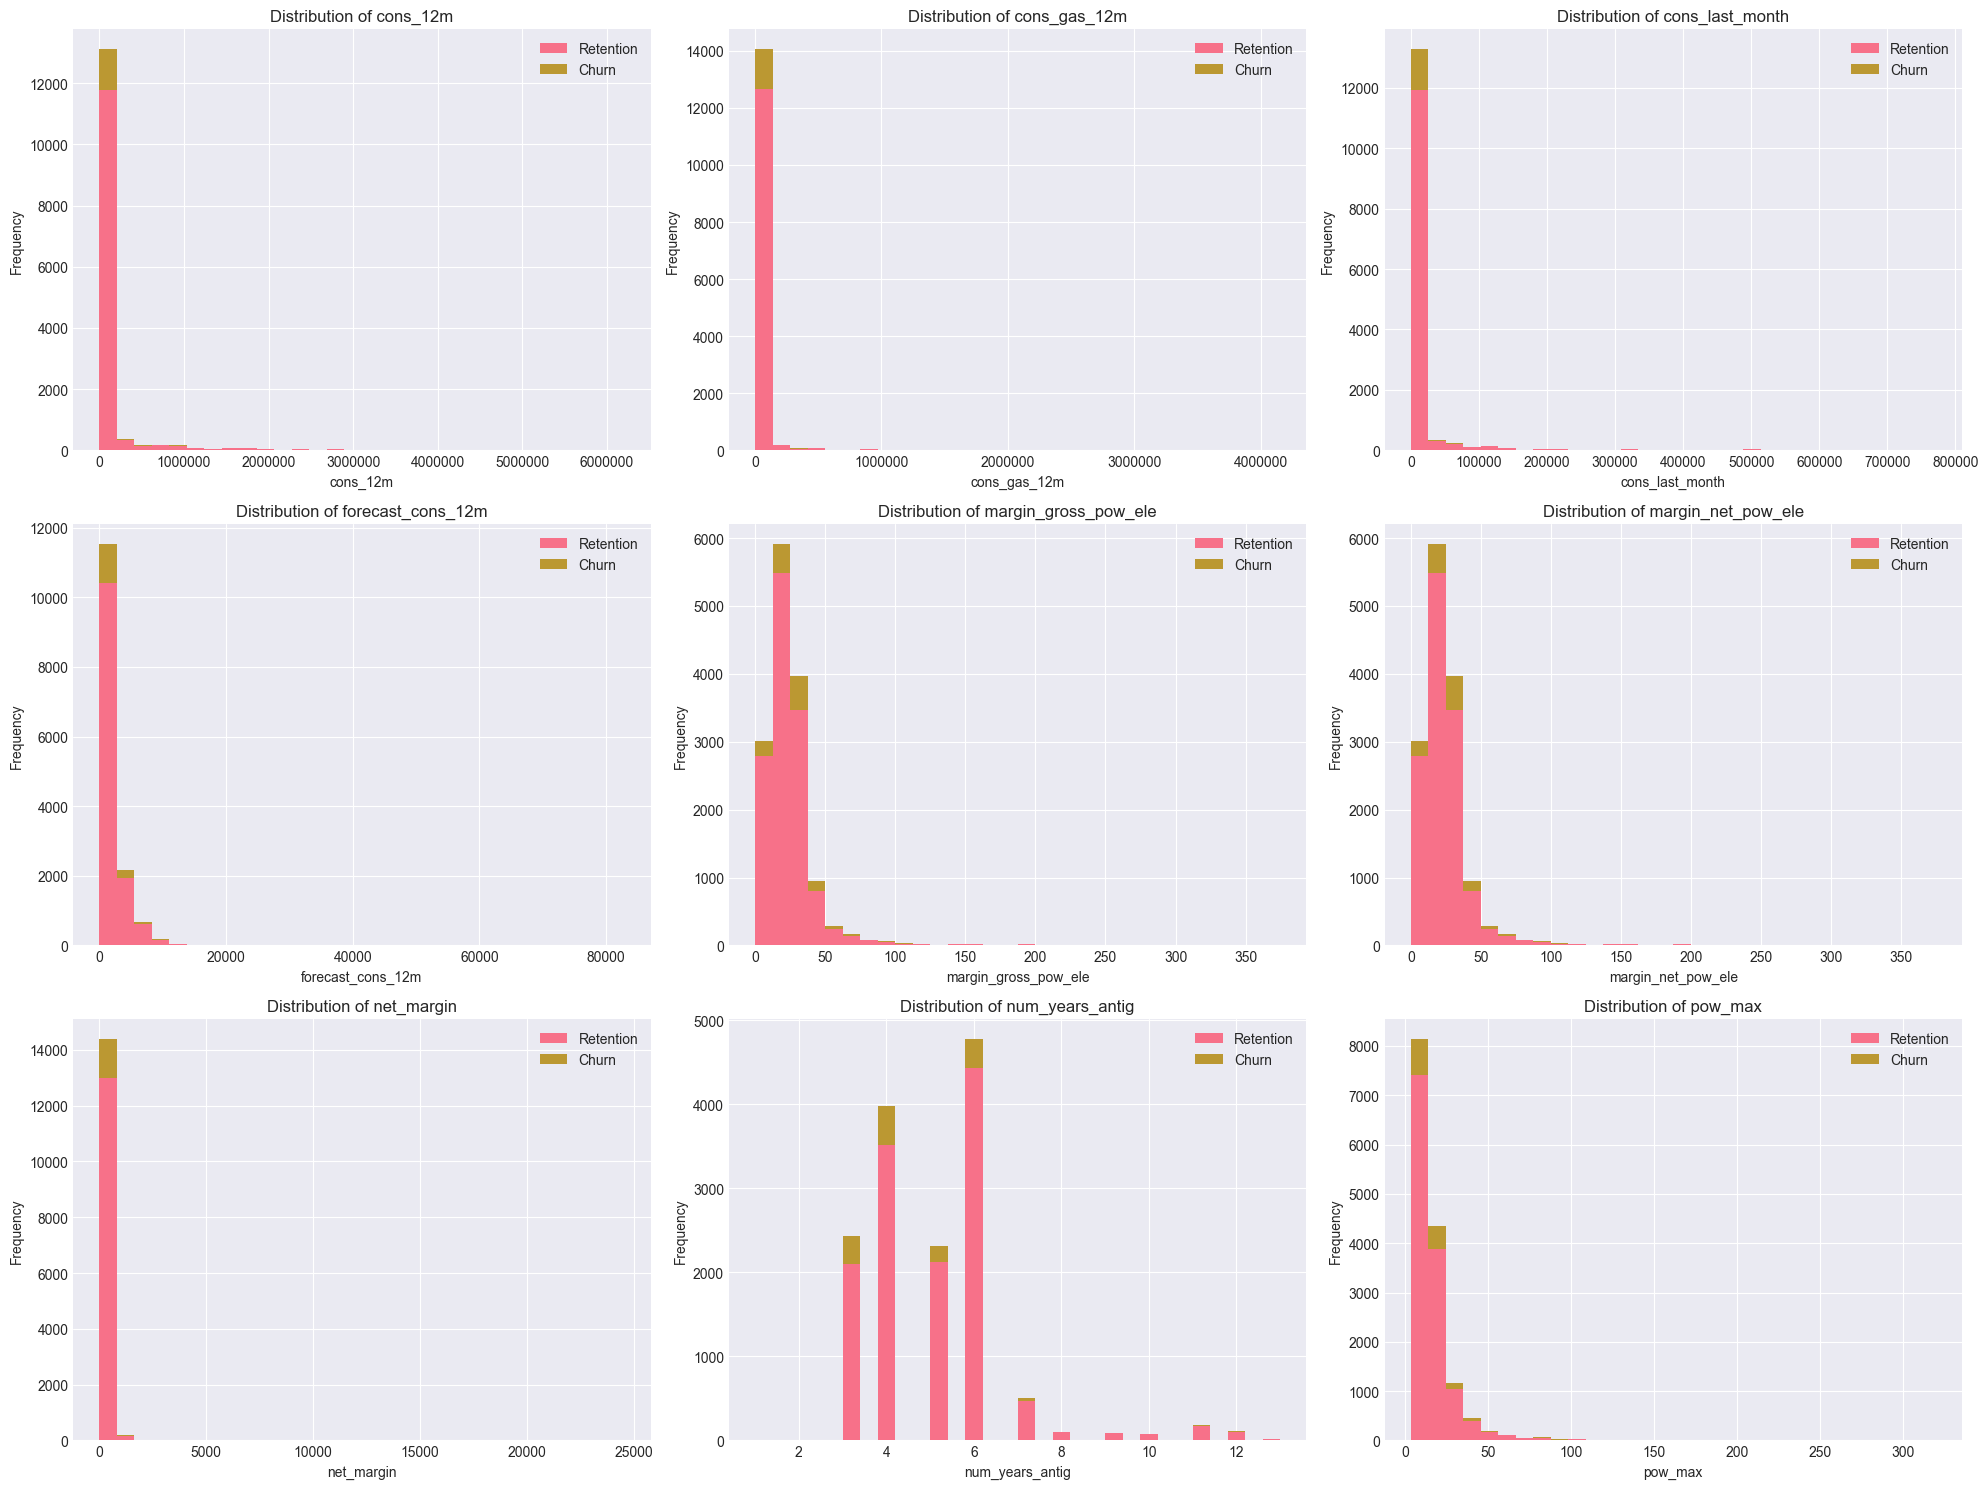


CORRELATION ANALYSIS


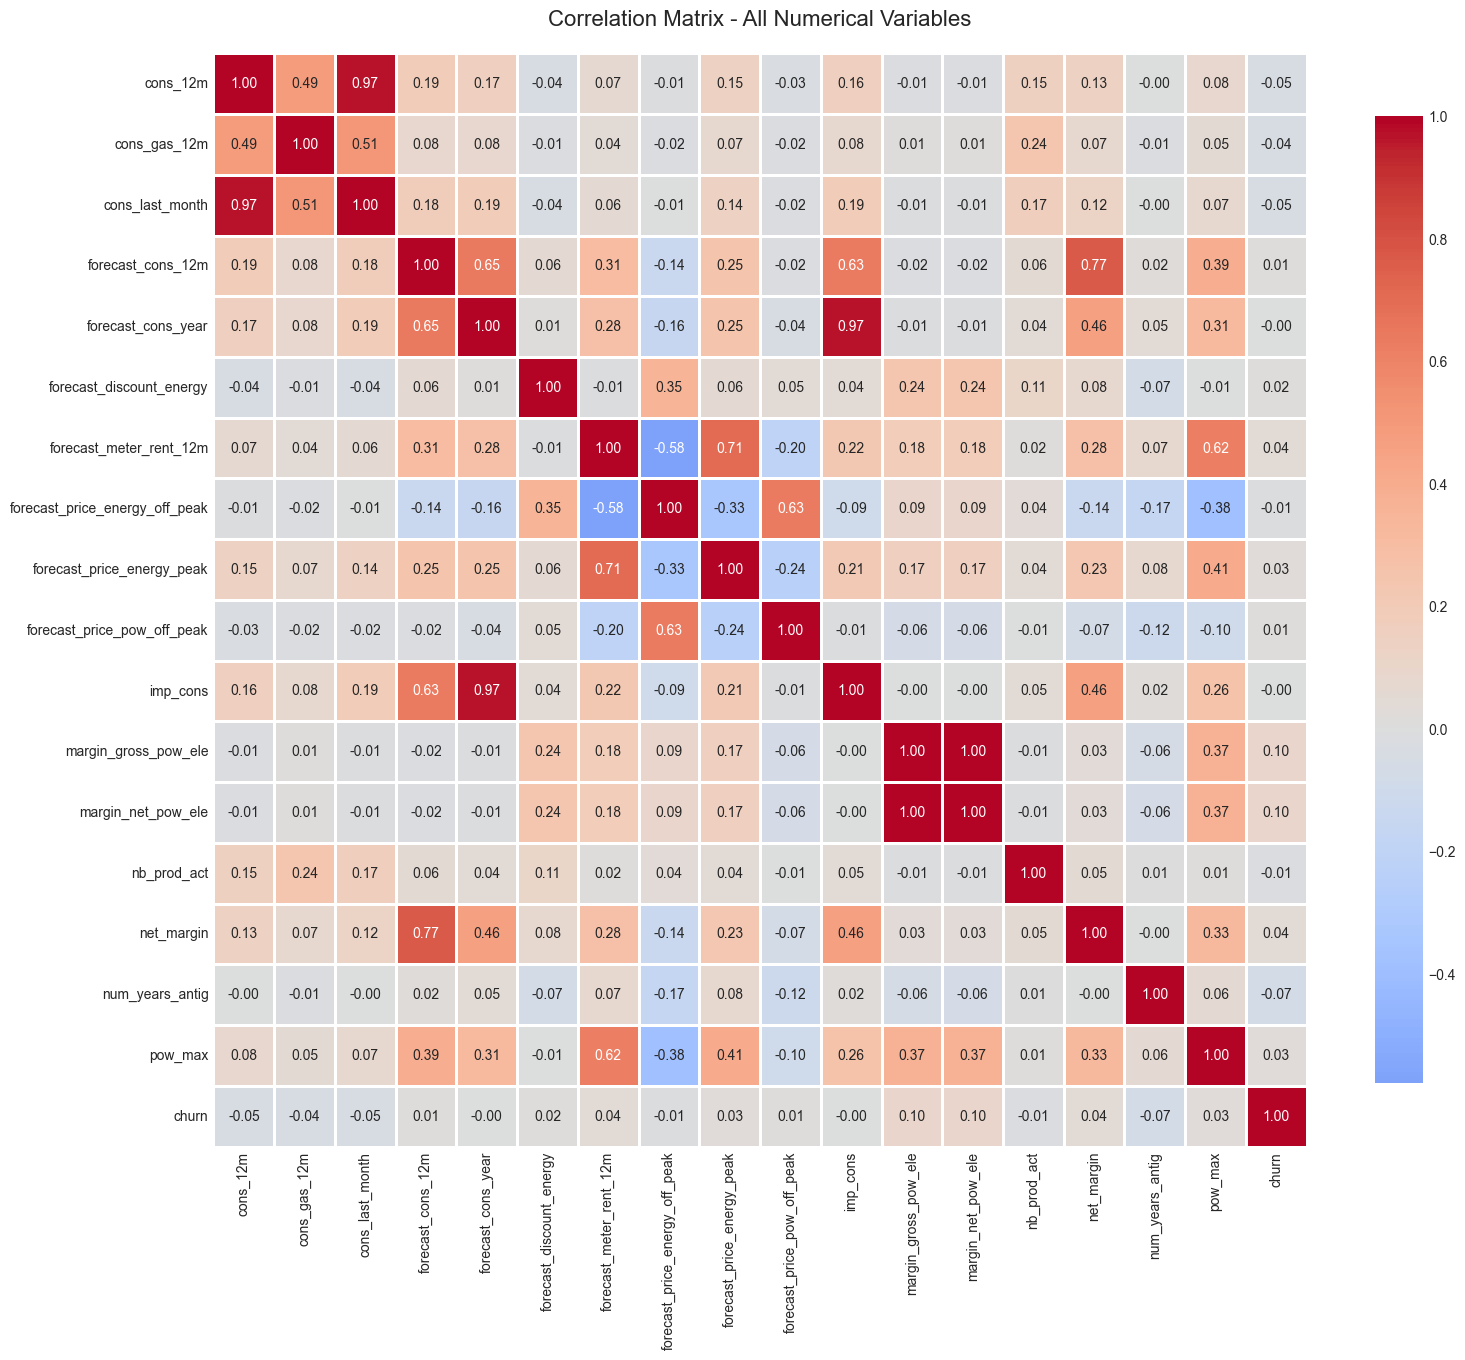


Correlations with Churn:
churn                             1.000000
margin_net_pow_ele                0.095772
margin_gross_pow_ele              0.095725
forecast_meter_rent_12m           0.044245
net_margin                        0.041135
pow_max                           0.030362
forecast_price_energy_peak        0.029315
forecast_discount_energy          0.017026
forecast_price_pow_off_peak       0.014778
forecast_cons_12m                 0.012949
imp_cons                         -0.001583
forecast_cons_year               -0.002558
forecast_price_energy_off_peak   -0.010837
nb_prod_act                      -0.014930
cons_gas_12m                     -0.037957
cons_last_month                  -0.045284
cons_12m                         -0.045968
num_years_antig                  -0.074140
Name: churn, dtype: float64

OUTLIER DETECTION - BOXPLOTS


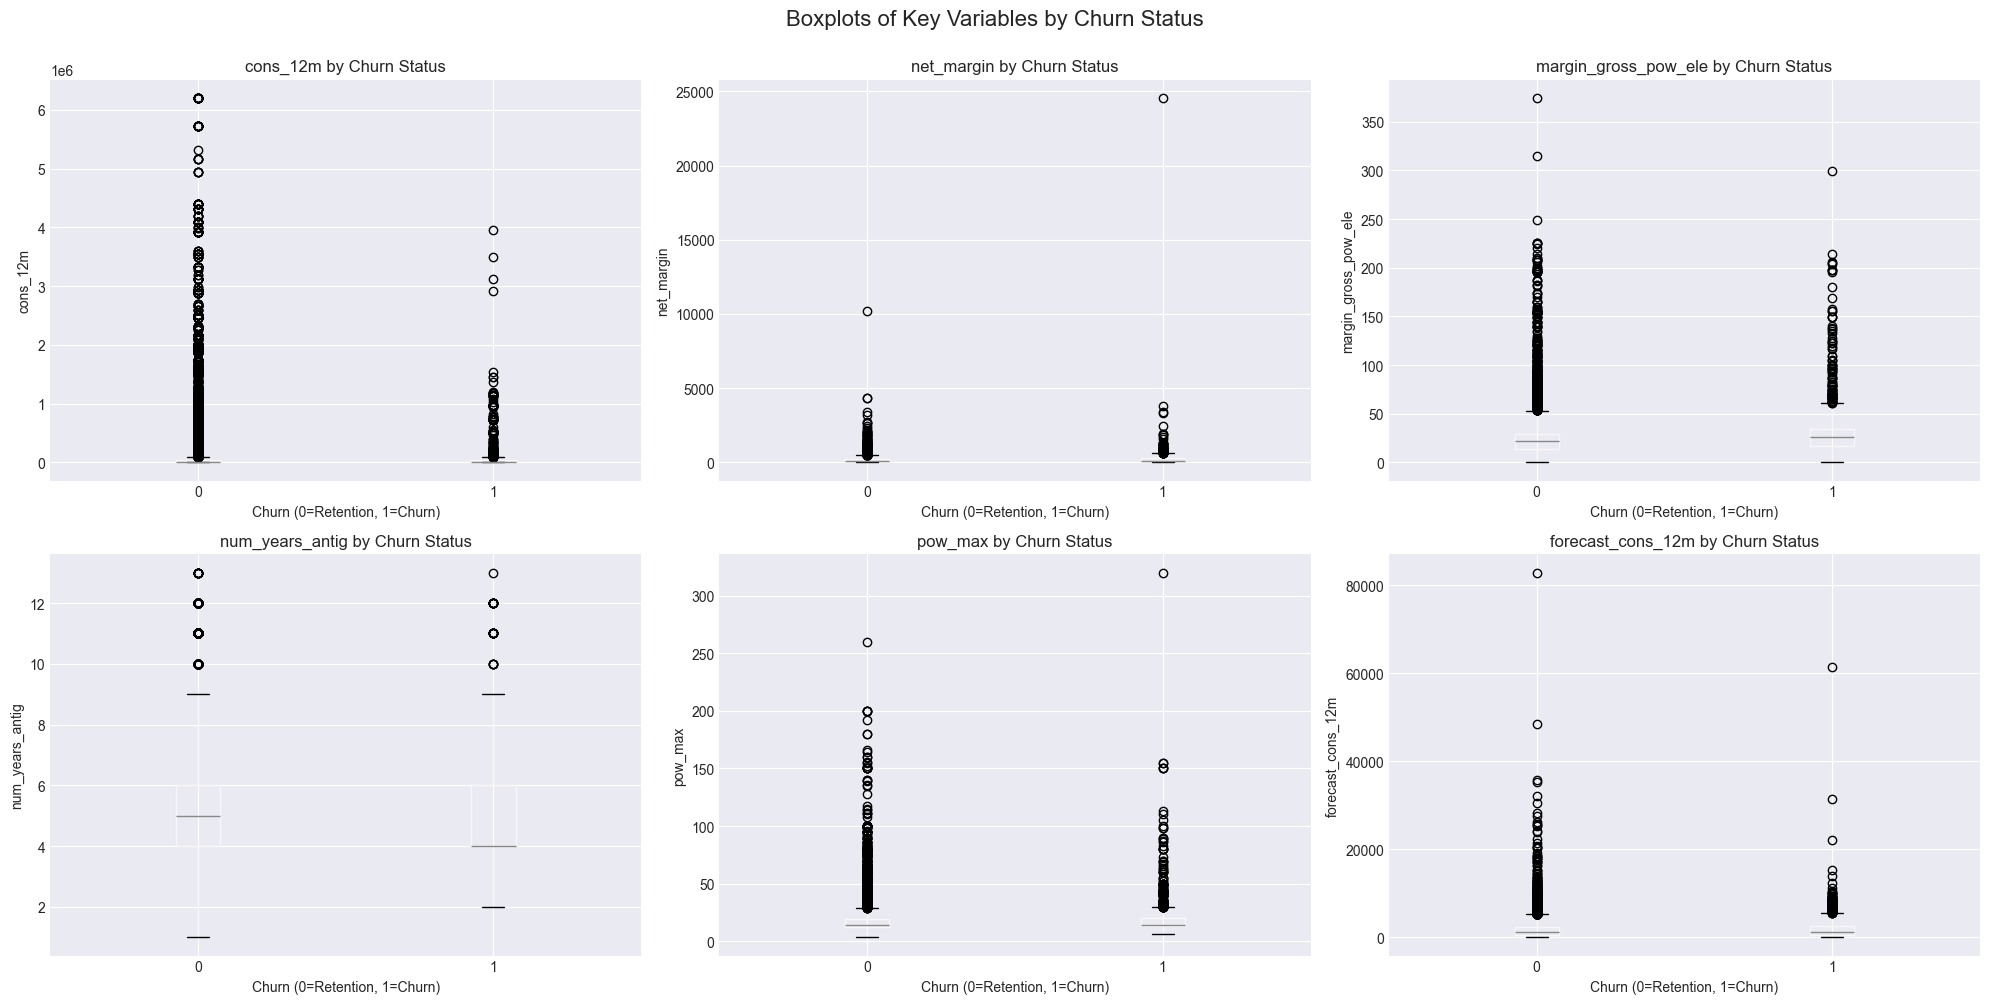


STATISTICAL COMPARISON: CHURNED VS RETAINED

Comparison of Key Metrics:
            Variable  Retained_Mean  Churned_Mean  Retained_Median  Churned_Median  Mean_Diff_%
            cons_12m  167867.266550  78862.478506        14075.000       14529.000   -53.020931
        cons_gas_12m   30121.497308   9235.411557            0.000           0.000   -69.339467
          net_margin     185.057407    228.361938          111.860         121.860    23.400594
margin_gross_pow_ele      23.929863     30.468682           21.480          26.040    27.324935
     num_years_antig       5.037006      4.633545            5.000           4.000    -8.009944
             pow_max      18.000339     19.387827           13.856          13.856     7.708126
         nb_prod_act       1.295822      1.260042            1.000           1.000    -2.761133

TIME-BASED ANALYSIS

Churn Rate by Activation Year:
                 Churned  Total  Churn_Rate
activation_year                            
2003              

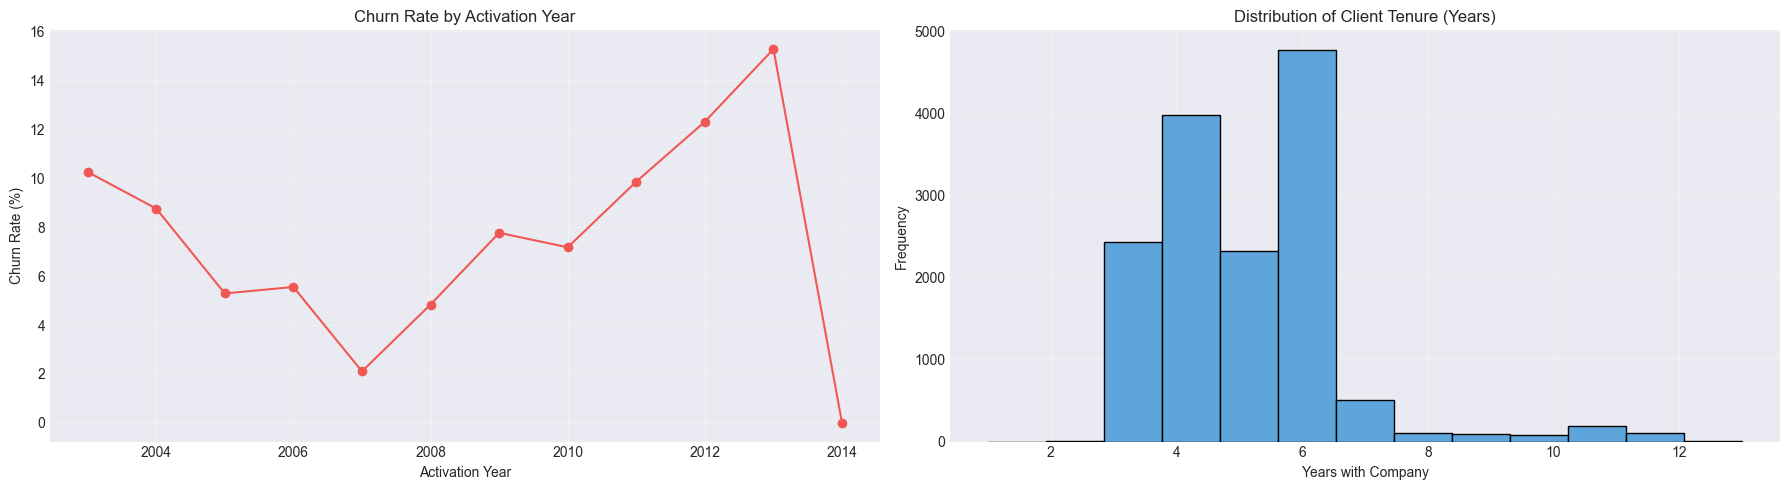


Churn Rate by Tenure (Years):
                 Churned  Total  Churn_Rate
num_years_antig                            
1                      0      1    0.000000
2                      3     11   27.272727
3                    329   2433   13.522400
4                    472   3982   11.853340
5                    200   2317    8.631852
6                    339   4769    7.108408
7                     42    509    8.251473
8                      5    103    4.854369
9                      1     92    1.086957
10                     4     81    4.938272
11                    12    185    6.486486
12                    11    110   10.000000
13                     1     13    7.692308

PRICE DATA ANALYSIS


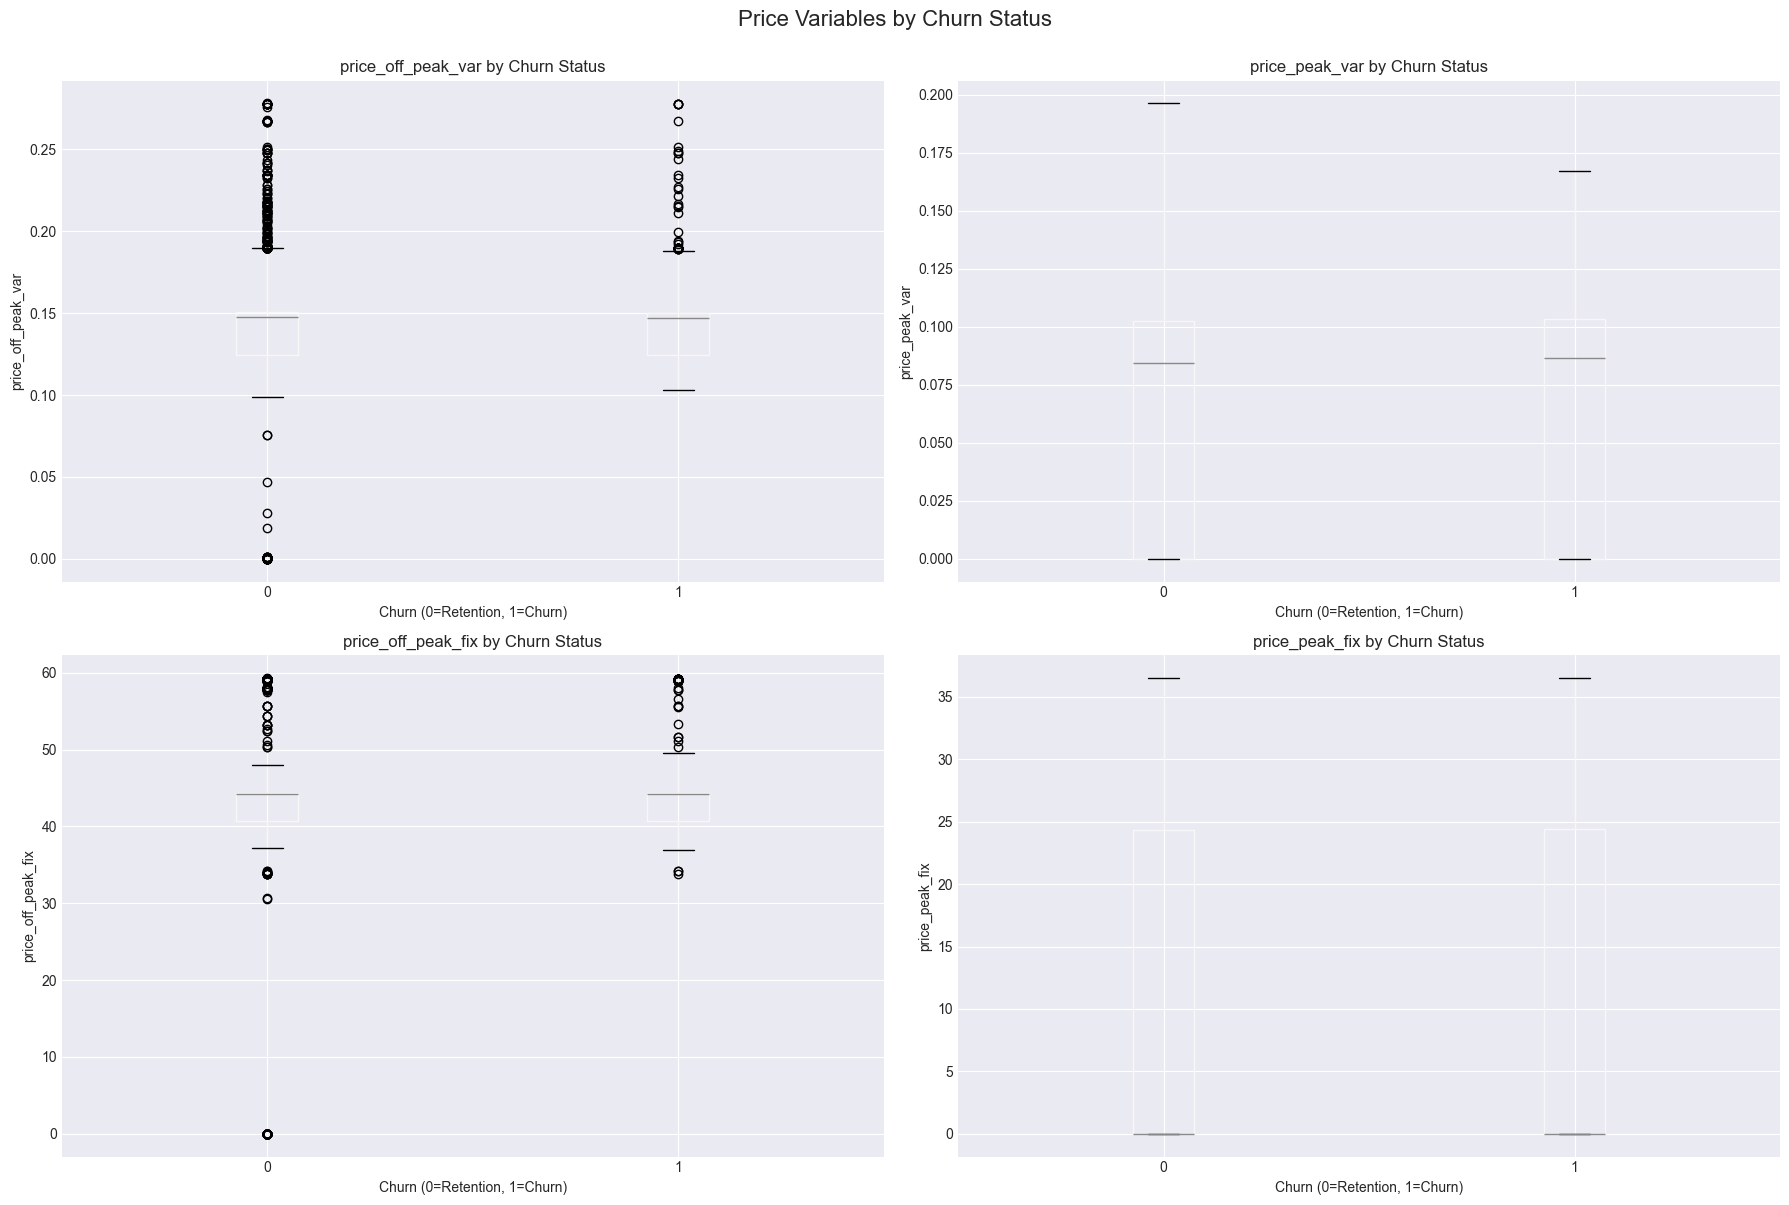


price_off_peak_var:
  Retained: 0.1424
  Churned: 0.1419
  Difference: -0.0005

price_peak_var:
  Retained: 0.0516
  Churned: 0.0566
  Difference: 0.0050

price_off_peak_fix:
  Retained: 42.9038
  Churned: 43.1619
  Difference: 0.2581

price_peak_fix:
  Retained: 9.2741
  Churned: 11.1967
  Difference: 1.9226

SUMMARY STATISTICS BY CHURN STATUS

Detailed statistics by churn status:
churn                       0              1
cons_12m count   13187.000000    1419.000000
         mean   167867.266550   78862.478506
         std    596815.827246  260433.325508
         min         0.000000       0.000000
         25%      5645.000000    5836.000000
...                       ...            ...
churn    min         0.000000       1.000000
         25%         0.000000       1.000000
         50%         0.000000       1.000000
         75%         0.000000       1.000000
         max         0.000000       1.000000

[144 rows x 2 columns]

EDA COMPLETE!


In [12]:
# Extended EDA for Client Churn Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style for better visualizations
sns.set_palette("husl")
plt.style.use('seaborn-v0_8-darkgrid')

# ============================================
# 1. MISSING VALUES ANALYSIS
# ============================================
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

def check_missing_values(df, df_name):
    """Check for missing values in the dataset"""
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing_Count': missing,
        'Percentage': missing_pct
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    
    if len(missing_df) > 0:
        print(f"\n{df_name} - Missing Values:")
        print(missing_df)
    else:
        print(f"\n{df_name}: No missing values found!")
    return missing_df

missing_client = check_missing_values(client_df, "Client Data")
missing_price = check_missing_values(price_df, "Price Data")

# ============================================
# 2. CHURN DISTRIBUTION BY CATEGORICAL VARIABLES
# ============================================
print("\n" + "="*60)
print("CHURN DISTRIBUTION BY CATEGORICAL VARIABLES")
print("="*60)

categorical_cols = ['channel_sales', 'has_gas', 'origin_up']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Churn Distribution by Categorical Variables', fontsize=16, y=1.02)

for idx, col in enumerate(categorical_cols):
    if col in client_df.columns:
        churn_by_cat = pd.crosstab(client_df[col], client_df['churn'], normalize='index') * 100
        churn_by_cat.plot(kind='bar', stacked=True, ax=axes[idx], color=['#5DA5DA', '#FAA43A'])
        axes[idx].set_title(f'Churn Rate by {col}')
        axes[idx].set_ylabel('Percentage (%)')
        axes[idx].set_xlabel(col)
        axes[idx].legend(['Retention', 'Churn'], loc='upper right')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print churn rates
for col in categorical_cols:
    if col in client_df.columns:
        churn_rate = client_df.groupby(col)['churn'].agg(['sum', 'count', 'mean'])
        churn_rate.columns = ['Churned', 'Total', 'Churn_Rate']
        churn_rate['Churn_Rate'] = churn_rate['Churn_Rate'] * 100
        print(f"\nChurn Rate by {col}:")
        print(churn_rate.sort_values('Churn_Rate', ascending=False))

# ============================================
# 3. NUMERICAL VARIABLES DISTRIBUTION
# ============================================
print("\n" + "="*60)
print("NUMERICAL VARIABLES DISTRIBUTION ANALYSIS")
print("="*60)

numerical_cols = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 
                  'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 
                  'num_years_antig', 'pow_max']

# Create distribution plots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    plot_distribution(client_df, col, axes[idx], bins_=30)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].legend(['Retention', 'Churn'])

plt.tight_layout()
plt.show()

# ============================================
# 4. CORRELATION ANALYSIS
# ============================================
print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Select numerical columns for correlation
numeric_cols = client_df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = client_df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Numerical Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Print correlations with churn
churn_correlations = correlation_matrix['churn'].sort_values(ascending=False)
print("\nCorrelations with Churn:")
print(churn_correlations)

# ============================================
# 5. BOXPLOTS - OUTLIER DETECTION
# ============================================
print("\n" + "="*60)
print("OUTLIER DETECTION - BOXPLOTS")
print("="*60)

key_vars = ['cons_12m', 'net_margin', 'margin_gross_pow_ele', 
            'num_years_antig', 'pow_max', 'forecast_cons_12m']

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(key_vars):
    client_df.boxplot(column=col, by='churn', ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn Status')
    axes[idx].set_xlabel('Churn (0=Retention, 1=Churn)')
    axes[idx].set_ylabel(col)

plt.suptitle('Boxplots of Key Variables by Churn Status', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

# ============================================
# 6. STATISTICAL COMPARISON - CHURNED VS RETAINED
# ============================================
print("\n" + "="*60)
print("STATISTICAL COMPARISON: CHURNED VS RETAINED")
print("="*60)

comparison_vars = ['cons_12m', 'cons_gas_12m', 'net_margin', 'margin_gross_pow_ele',
                   'num_years_antig', 'pow_max', 'nb_prod_act']

retained = client_df[client_df['churn'] == 0]
churned = client_df[client_df['churn'] == 1]

comparison_df = pd.DataFrame({
    'Variable': comparison_vars,
    'Retained_Mean': [retained[col].mean() for col in comparison_vars],
    'Churned_Mean': [churned[col].mean() for col in comparison_vars],
    'Retained_Median': [retained[col].median() for col in comparison_vars],
    'Churned_Median': [churned[col].median() for col in comparison_vars]
})

comparison_df['Mean_Diff_%'] = ((comparison_df['Churned_Mean'] - comparison_df['Retained_Mean']) / 
                                 comparison_df['Retained_Mean'] * 100)

print("\nComparison of Key Metrics:")
print(comparison_df.to_string(index=False))

# ============================================
# 7. TIME-BASED ANALYSIS
# ============================================
print("\n" + "="*60)
print("TIME-BASED ANALYSIS")
print("="*60)

# Convert date columns
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_columns:
    client_df[col] = pd.to_datetime(client_df[col], errors='coerce')

# Extract year and month from date_activ
client_df['activation_year'] = client_df['date_activ'].dt.year
client_df['activation_month'] = client_df['date_activ'].dt.month

# Churn by activation year
churn_by_year = client_df.groupby('activation_year')['churn'].agg(['sum', 'count', 'mean'])
churn_by_year.columns = ['Churned', 'Total', 'Churn_Rate']
churn_by_year['Churn_Rate'] = churn_by_year['Churn_Rate'] * 100

print("\nChurn Rate by Activation Year:")
print(churn_by_year)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Churn rate by year
churn_by_year['Churn_Rate'].plot(kind='line', marker='o', ax=axes[0], color='#F15854')
axes[0].set_title('Churn Rate by Activation Year')
axes[0].set_xlabel('Activation Year')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].grid(True, alpha=0.3)

# Client tenure analysis
client_df['num_years_antig'].hist(bins=13, ax=axes[1], color='#5DA5DA', edgecolor='black')
axes[1].set_title('Distribution of Client Tenure (Years)')
axes[1].set_xlabel('Years with Company')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Churn by tenure
churn_by_tenure = client_df.groupby('num_years_antig')['churn'].agg(['sum', 'count', 'mean'])
churn_by_tenure.columns = ['Churned', 'Total', 'Churn_Rate']
churn_by_tenure['Churn_Rate'] = churn_by_tenure['Churn_Rate'] * 100

print("\nChurn Rate by Tenure (Years):")
print(churn_by_tenure)

# ============================================
# 8. PRICE DATA ANALYSIS
# ============================================
print("\n" + "="*60)
print("PRICE DATA ANALYSIS")
print("="*60)

# Convert price_date to datetime
price_df['price_date'] = pd.to_datetime(price_df['price_date'], errors='coerce')

# Calculate average prices per client
avg_prices = price_df.groupby('id').agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

# Merge with client data
client_with_prices = client_df.merge(avg_prices, on='id', how='left')

# Price distribution by churn status
price_cols = ['price_off_peak_var', 'price_peak_var', 'price_off_peak_fix', 'price_peak_fix']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(price_cols):
    if col in client_with_prices.columns:
        client_with_prices.boxplot(column=col, by='churn', ax=axes[idx])
        axes[idx].set_title(f'{col} by Churn Status')
        axes[idx].set_xlabel('Churn (0=Retention, 1=Churn)')
        axes[idx].set_ylabel(col)

plt.suptitle('Price Variables by Churn Status', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

# Price comparison
for col in price_cols:
    if col in client_with_prices.columns:
        retained_price = client_with_prices[client_with_prices['churn']==0][col].mean()
        churned_price = client_with_prices[client_with_prices['churn']==1][col].mean()
        print(f"\n{col}:")
        print(f"  Retained: {retained_price:.4f}")
        print(f"  Churned: {churned_price:.4f}")
        print(f"  Difference: {(churned_price - retained_price):.4f}")

# ============================================
# 9. SUMMARY STATISTICS BY CHURN
# ============================================
print("\n" + "="*60)
print("SUMMARY STATISTICS BY CHURN STATUS")
print("="*60)

summary_stats = client_df.groupby('churn')[numeric_cols].describe().T
print("\nDetailed statistics by churn status:")
print(summary_stats)

print("\n" + "="*60)
print("EDA COMPLETE!")
print("="*60)